In [11]:
import geopandas as gpd

In [13]:
import json

# Replace with the path to your JSON file
json_file = 'SIP_camden_allmodes.json'

# Open and load the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

data


[{'source': 'E01000001',
  'target': 'E01000001',
  'SIP_bi': 20.174807957248206,
  'SIP_pt': 20.39512853048729,
  'SIP_dr': 20.8428960215168},
 {'source': 'E01000001',
  'target': 'E01000003',
  'SIP_bi': 20.1722308789273,
  'SIP_pt': 20.34877843027673,
  'SIP_dr': 20.838377644046417},
 {'source': 'E01000001',
  'target': 'E01000850',
  'SIP_bi': 20.102467025663625,
  'SIP_pt': 20.295061393733747,
  'SIP_dr': 20.7572922604482},
 {'source': 'E01000001',
  'target': 'E01000851',
  'SIP_bi': 20.081281620678293,
  'SIP_pt': 20.332454794123517,
  'SIP_dr': 20.740264996652915},
 {'source': 'E01000001',
  'target': 'E01000853',
  'SIP_bi': 20.093854228528006,
  'SIP_pt': 20.321144194223347,
  'SIP_dr': 20.776308105651953},
 {'source': 'E01000001',
  'target': 'E01000855',
  'SIP_bi': 20.10144691884047,
  'SIP_pt': 20.32172722704486,
  'SIP_dr': 20.788040344358127},
 {'source': 'E01000001',
  'target': 'E01000859',
  'SIP_bi': 19.970073145212464,
  'SIP_pt': 19.771751395247815,
  'SIP_dr': 20

In [26]:
import geopandas as gpd

# Assuming 'gdf' is your GeoDataFrame
shapefile_path = 'Camden.shp'
gdf = gpd.read_file(shapefile_path)

#Make sure to set the CRS to 4326 before continuing.
gdf = gdf.to_crs("EPSG:4326")

# If you want to use the original polygon geometry
gdf = gdf.set_geometry('geometry')

# If you want to use the centroid geometry, if it exist.
# gdf = gdf.set_geometry('centroid')

# Save to GeoJSON
geojson_path = 'camden2.geojson'
gdf.to_file(geojson_path, driver='GeoJSON')

<Axes: >

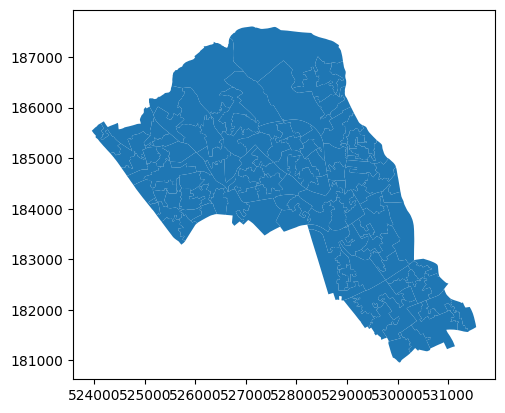

In [16]:
gdf.plot()

In [17]:
import geopandas as gpd

# Assuming you already have a GeoDataFrame (gdf)
# Replace with your desired output file path
geojson_path = 'camden.geojson'

# Save the GeoDataFrame as a GeoJSON file
gdf.to_file(geojson_path, driver='GeoJSON')

import geopandas as gpd
from shapely.geometry import Point


# Ensure the data is in the correct coordinate reference system (CRS)
gdf = gdf.to_crs("EPSG:4326")

# Calculate the centroids of the geometries in the GeoDataFrame
gdf['centroid'] = gdf.geometry.centroid

# Calculate the mean x and y coordinates of the centroids
mean_x = gdf['centroid'].x.mean()
mean_y = gdf['centroid'].y.mean()

# The mean centroid is the point with mean_x and mean_y
mean_centroid = Point(mean_x, mean_y)

# Create a GeoDataFrame to store the mean centroid
mean_centroid_gdf = gpd.GeoDataFrame(geometry=[mean_centroid], crs=gdf.crs)

# View the mean centroid
print("Mean Centroid:", mean_centroid_gdf)
